In [1]:
import numpy as np
import pandas as pd

**Training Data**

In [2]:

# Reading Training Data
train_data = pd.read_csv('train.csv',index_col='Id')

train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
num_df = train_data.select_dtypes(exclude="object")
num_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [4]:
miss_cols = [col for col in num_df if num_df[col].isnull().any()]
miss_cols

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [5]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer()
imp.fit(num_df[miss_cols])
df_imputed = pd.DataFrame(imp.transform(num_df[miss_cols]), columns=num_df[miss_cols].columns)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

**Testing Data**

In [7]:
test_data = pd.read_csv('test.csv', index_col='Id')
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

# Categorical Columns

In [9]:
categorical_cols = [col for col in train_data.columns
                    if train_data[col].dtype == object
                    and train_data[col].nunique() <= 10]

# We won't use columns that have more than 10 unique values

In [10]:
miss_categorical_cols_train = [col for col in categorical_cols
                         if train_data[col].isnull().any()]

train_data[miss_categorical_cols_train].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Alley         91 non-null     object
 1   MasVnrType    1452 non-null   object
 2   BsmtQual      1423 non-null   object
 3   BsmtCond      1423 non-null   object
 4   BsmtExposure  1422 non-null   object
 5   BsmtFinType1  1423 non-null   object
 6   BsmtFinType2  1422 non-null   object
 7   Electrical    1459 non-null   object
 8   FireplaceQu   770 non-null    object
 9   GarageType    1379 non-null   object
 10  GarageFinish  1379 non-null   object
 11  GarageQual    1379 non-null   object
 12  GarageCond    1379 non-null   object
 13  PoolQC        7 non-null      object
 14  Fence         281 non-null    object
 15  MiscFeature   54 non-null     object
dtypes: object(16)
memory usage: 193.9+ KB


In [11]:
# More than 50% of these columns are missing values
categorical_cols.remove('PoolQC')
categorical_cols.remove('MiscFeature')
categorical_cols.remove('Fence')
categorical_cols.remove('Alley')

In [12]:
miss_categorical_cols_test = [col for col in categorical_cols
                         if test_data[col].isnull().any()]

train_data[miss_categorical_cols_test].info()

print("\nMissing Values columns in the test data that don't have missing values in train data:\n\n"
      ,list(set(miss_categorical_cols_test) - set(miss_categorical_cols_train)))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1460 non-null   object
 1   Utilities     1460 non-null   object
 2   MasVnrType    1452 non-null   object
 3   BsmtQual      1423 non-null   object
 4   BsmtCond      1423 non-null   object
 5   BsmtExposure  1422 non-null   object
 6   BsmtFinType1  1423 non-null   object
 7   BsmtFinType2  1422 non-null   object
 8   KitchenQual   1460 non-null   object
 9   Functional    1460 non-null   object
 10  FireplaceQu   770 non-null    object
 11  GarageType    1379 non-null   object
 12  GarageFinish  1379 non-null   object
 13  GarageQual    1379 non-null   object
 14  GarageCond    1379 non-null   object
 15  SaleType      1460 non-null   object
dtypes: object(16)
memory usage: 193.9+ KB

Missing Values columns in the test data that don't have missing values in train data:

 ['Uti

# Numerical colums

In [13]:
numerical_cols = [col for col in train_data.columns
                   if train_data[col].dtype != object]
numerical_cols.remove('SalePrice')

In [14]:
miss_numerical_cols_train = [col for col in numerical_cols
                         if train_data[col].isnull().any()]

train_data[miss_numerical_cols_train].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrArea   1452 non-null   float64
 2   GarageYrBlt  1379 non-null   float64
dtypes: float64(3)
memory usage: 45.6 KB


In [15]:
miss_numerical_cols_test = [col for col in numerical_cols
                            if test_data[col].isnull().any()]
train_data[miss_numerical_cols_test].info()

print("\nMissing Values columns in the test data that don't have missing values in train data:\n\n"
      ,list(set(miss_numerical_cols_test) - set(miss_numerical_cols_train)))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrArea    1452 non-null   float64
 2   BsmtFinSF1    1460 non-null   int64  
 3   BsmtFinSF2    1460 non-null   int64  
 4   BsmtUnfSF     1460 non-null   int64  
 5   TotalBsmtSF   1460 non-null   int64  
 6   BsmtFullBath  1460 non-null   int64  
 7   BsmtHalfBath  1460 non-null   int64  
 8   GarageYrBlt   1379 non-null   float64
 9   GarageCars    1460 non-null   int64  
 10  GarageArea    1460 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 136.9 KB

Missing Values columns in the test data that don't have missing values in train data:

 ['BsmtFinSF2', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 'GarageCars', 'TotalBsmtSF', 'BsmtFullBath']


# Analysing data

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
pd.options.plotting.backend = "plotly"

my_cols = numerical_cols + categorical_cols

my_cols_with_price = my_cols + ['SalePrice']
corr_train = train_data[my_cols_with_price].corr()
corr_train[['SalePrice']].sort_values(by='SalePrice',ascending=False).style.background_gradient(cmap='viridis', axis=None)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [17]:
train_data['SalePrice'].hist()

In [18]:
train_data['LotArea'].hist()

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

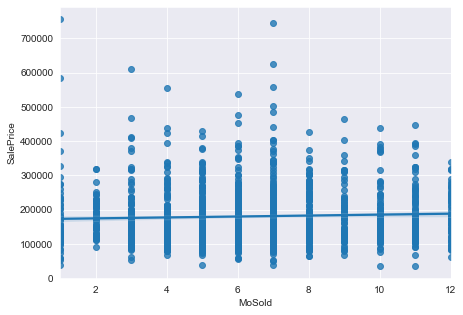

In [19]:
sns.set_style('darkgrid')

plt.figure(figsize=(7,5))
sns.regplot(x=train_data['MoSold'], 
            y=train_data['SalePrice'],
            )

According to the correlational dataframe, we will remove the columns that have a **absolute** correlation with SalePrice less than **0.04**.

In [20]:
numerical_cols.remove('MoSold')
numerical_cols.remove('YrSold')
numerical_cols.remove('LowQualFinSF')
numerical_cols.remove('MiscVal')
numerical_cols.remove('BsmtHalfBath')
numerical_cols.remove('BsmtFinSF2')

In [21]:
from sklearn.model_selection import train_test_split

my_cols = numerical_cols + categorical_cols
y = train_data.SalePrice
X = train_data[my_cols]

train_X, val_X, train_y, val_y = train_test_split(X, y,
                                                       random_state=0,
                                                       train_size=0.8,
                                                       test_size=0.2)

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Preprocessing numerical data
numerical_transformer = Pipeline(steps=[
                                        ('imputer_num', SimpleImputer(strategy='median')),
                                        ('scaler_num', StandardScaler())
])

# Preprocessing categorical data
categorical_transformer = Pipeline(steps=[
                                 ('imputer', SimpleImputer(strategy='constant')),
                                 ('onehot', OneHotEncoder(handle_unknown='ignore')),
                                 ('scaler', StandardScaler())
])

# Transforming all data
preprocessor = ColumnTransformer(transformers=[
                                ('num', numerical_transformer, numerical_cols),
                                ('cat', categorical_transformer, categorical_cols)
])

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Preprocessing numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing categorical data
categorical_transformer = Pipeline(steps=[
                                 ('imputer', SimpleImputer(strategy='constant')),
                                 ('onehot', OneHotEncoder(handle_unknown='ignore') )
])

# Transforming all data
preprocessor = ColumnTransformer(transformers=[
                                ('num', numerical_transformer, numerical_cols),
                                ('cat', categorical_transformer, categorical_cols)
])

In [24]:
train_X_prep = pd.DataFrame(preprocessor.fit_transform(train_X).todense())
val_X_prep = pd.DataFrame(preprocessor.transform(val_X).todense())

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X_prep = pd.DataFrame(scaler.fit_transform(train_X_prep))
val_X_prep = pd.DataFrame(scaler.transform(val_X_prep))

In [26]:
train_X_prep.head()

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
0,-0.868365,0.987831,0.103212,2.131506,-0.513041,1.188032,1.078914,1.914933,-0.901062,2.757198,...,-0.065568,3.341656,-0.041416,-2.615134,-0.269339,-0.050746,-0.077648,-0.101885,-2.206660,3.304295
1,-0.868365,-0.457956,-0.372881,-0.794852,-0.513041,-0.292501,-1.097548,-0.564793,-1.011427,0.745229,...,-0.065568,-0.299253,-0.041416,0.382390,-0.269339,-0.050746,-0.077648,-0.101885,0.453174,-0.302636
2,-0.631142,0.505902,0.258919,-0.794852,1.278384,-1.641431,1.030548,-0.564793,0.627953,-0.926076,...,-0.065568,-0.299253,-0.041416,0.382390,-0.269339,-0.050746,-0.077648,-0.101885,0.453174,-0.302636
3,-0.868365,-0.024220,0.250040,1.399917,-0.513041,1.023528,0.837085,0.247153,1.789085,-0.498533,...,-0.065568,-0.299253,-0.041416,0.382390,-0.269339,-0.050746,-0.077648,-0.101885,0.453174,-0.302636
4,-0.868365,2.337233,0.291070,0.668327,-0.513041,0.990627,0.837085,0.258125,-1.011427,2.224484,...,-0.065568,-0.299253,-0.041416,0.382390,-0.269339,-0.050746,-0.077648,-0.101885,0.453174,-0.302636


In [27]:
train_X_prep.shape

(1168, 221)

In [28]:
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import plotly.express as px

pca = PCA()
pca.fit(train_X_prep)

features = range(pca.n_components_)

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x = list(features),
        y = 1 - pca.explained_variance_ratio_
    )
)

fig.show()

In [29]:
for i in features:
    if 1 - pca.explained_variance_ratio_[i] > 0.999999:
        n_components = i
        break
        
pca = PCA(n_components=n_components)

train_X = pd.DataFrame(pca.fit_transform(train_X_prep))
val_X = pd.DataFrame(pca.transform(val_X_prep))

# Comparing different Regression Models

In [30]:
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=0,
                                 n_estimators=149)

# Fitting the training data in the model
rf_model.fit(train_X, train_y)

# Predictions
preds_rf = rf_model.predict(val_X)

# Mean Absolute Error between the actual values and the predictions
mae_rf = mean_absolute_error(val_y, preds_rf)

print("Validation MAE for Random Forest Regressor: %0.2f"%(mae_rf))



## XGB Regressor
xgb_model = XGBRegressor(n_estimators=5000, 
                         learning_rate=0.005,
                         n_jobs=4
                         )

# Fitting the training data in the model
xgb_model.fit(train_X, train_y,early_stopping_rounds=5,
              eval_set=[(val_X, val_y)],
              verbose=False)

# Predictions
preds_xgb = xgb_model.predict(val_X)

# Mean Absolute Error between the actual values and the predictions
mae_xgb = mean_absolute_error(preds_xgb, val_y)
print("Validation MAE for XGBoost Regressor: %0.2f" %mae_xgb)

Validation MAE for Random Forest Regressor: 21831.52
Validation MAE for XGBoost Regressor: 20021.42


In [31]:
xgb_model.best_ntree_limit

1054

# Training model with full data

In [32]:
# Preprocess the training data, fit model
my_model_full_data = XGBRegressor(n_estimators=xgb_model.best_ntree_limit, 
                         learning_rate=0.05,
                         n_jobs=4
                         )

full_X = pd.concat([train_X, val_X], axis=0)
full_y = pd.concat([train_y, val_y], axis=0)

my_model_full_data.fit(full_X, full_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1054, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Submission

In [33]:
test_X = test_data[my_cols].copy()

test_X_prep = pd.DataFrame(preprocessor.transform(test_X).todense())
test_X_prep = pd.DataFrame(scaler.transform(test_X_prep))
test_X = pd.DataFrame(pca.transform(test_X_prep))

In [34]:
test_preds = my_model_full_data.predict(test_X)

# Save test predictions to file
output = pd.DataFrame({'Id': test_data.index,
                       'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)

output.head()

,Id,SalePrice
0,1461,126694.093750
1,1462,160595.218750
2,1463,190353.437500
3,1464,203167.765625
4,1465,179204.468750
